Introduction: The team, Eugene Lim and Tyler Simms, will be using a dataset on 2023 LinkedIn Job Postings to identify trends within the current US job market, specifically for remote occupations and non-remote occupations. We will be working with this dataset because it provides great detail, and several datas we could use such as the type of job, pay period, salary, company IDs, and whether remote work is allowed or not.

Collaboration Plan: We plan to meet once a week through Zoom in order to work on the project. Alternative ways that we will use to communicate will be via text message, and also on a Trello dashboard where we will be uploading any important updates, questions, and idea proposals that we may have. We have also created a Github repo that is shared with each other in order to organize, update and maintain our code in order with each other. 

In [51]:
import pandas as pd
import numpy as np
pd.set_option("display.max_rows", 100)
job_postings_df = pd.read_csv("/Users/eugenelim/Downloads/archive/job_postings.csv")
job_postings_df.head()

job_postings_df = job_postings_df[job_postings_df['compensation_type'].notna()]
#Rows that do not have a compensation type are removed here using .notna()



Our first step of the project was to ensure that all the data we were using had a compensation value included. When looking at the dataset, we have noticed that there were many job postings that did not include a compensation value. So, in order to get rid of these rows without a compensation type, we've added a .na() function.

In [39]:
job_postings_df.dtypes

job_id                          int64
company_id                    float64
title                          object
description                    object
max_salary                    float64
med_salary                    float64
min_salary                    float64
pay_period                     object
formatted_work_type            object
location                       object
applies                       float64
original_listed_time          float64
remote_allowed                float64
views                         float64
job_posting_url                object
application_url                object
application_type               object
expiry                        float64
closed_time                   float64
formatted_experience_level     object
skills_desc                    object
listed_time                   float64
posting_domain                 object
sponsored                       int64
work_type                      object
currency                       object
compensation

In [ ]:
#Any salary that is based off of an hourly basis is adjusted to a yearly salary, by multiplying by 40 since that is the American national standard for weekly hours worked.
#This
job_postings_df['max_salary'] = job_postings_df.apply(lambda row: row['max_salary'] * 40 * 52 if row['pay_period'] == 'Hourly' else row['max_salary'], axis=1)
job_postings_df['med_salary'] = job_postings_df.apply(lambda row: row['med_salary'] * 40 * 52 if row['pay_period'] == 'Hourly' else row['med_salary'], axis=1)
job_postings_df['min_salary'] = job_postings_df.apply(lambda row: row['min_salary'] * 40 * 52 if row['pay_period'] == 'Hourly' else row['min_salary'], axis=1)
job_postings_df['pay_period'] = 'Yearly'  # Update the pay period to 'Yearly'

In [ ]:
#Fill non-remote workers with a value of 0
job_postings_df['remote_allowed'] = job_postings_df['remote_allowed'].fillna(0)

#Calculate summary statistics for remote and non-remote workers based on yearly median salary
remote_workers = job_postings_df[job_postings_df['remote_allowed'] == 1]
non_remote_workers = job_postings_df[job_postings_df['remote_allowed'] == 0]

# Summary statistics for remote workers
summary_remote = remote_workers['med_salary'].describe()

# Summary statistics for non-remote workers
summary_non_remote = non_remote_workers['med_salary'].describe()

# Print the summary statistics
print("Summary Statistics for Remote Workers:")
print(summary_remote)

print("\nSummary Statistics for Non-Remote Workers:")
print(summary_non_remote)


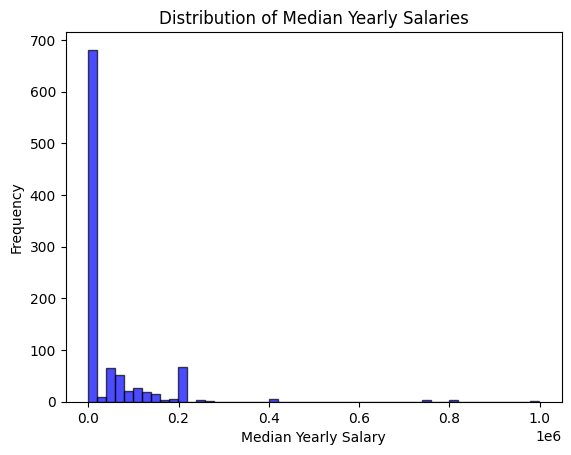

In [35]:
import matplotlib.pyplot as plt
job_postings_df['med_salary'].plot.hist(bins=50, color='blue', alpha=0.7, edgecolor='black', title='Distribution of Median Yearly Salaries')
plt.xlabel('Median Yearly Salary')
plt.ylabel('Frequency')
plt.show()


In [55]:
job_postings_df.title.value_counts().head(100).to_frame()

,count
title,
Sales Director [Owner/Operator],57
Retail Sales Associate,51
Call Center Support Rep,38
Scoring Content Specialist,36
Administrative Assistant,26
Customer Service Representative-Farmers Direct Services P&C Licensed (Kansas/Missouri),23
Sales Manager,23
Staff Accountant,22
Senior Accountant,21


In [61]:
job_postings_df["industries"] = job_postings_df["title"].copy()
job_postings_df["industries"].map({
    "Staff Accountant": "Accountant",
    "Senior Accountant": "Accountant",
    "Sales Director [Owner/Operator]": "Sales",
    "Sales Manager": "Sales",
    "Red Team Engineer": "Engineer",
    "Manufacturing Engineer": "Engineer",
    "Senior Data Engineer": "Engineer",
    "Software Engineer": "Engineer",
    "Senior Financial Analyst": "Finance",
    "Investment Analyst": "Finance",
    "Laboratory Technician": "Technician",
    "Maintenance Technician": "Technician",
    "Process Technician III - (T3)": "Technician"
    
})

job_postings_df.groupby(['industries']).describe()

job_postings_df


,job_id,company_id,title,description,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,...,closed_time,formatted_experience_level,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,industries
0,85008768,NaN,Licensed Insurance Agent,While many industries were hurt by the last fe...,52000.00,NaN,45760.00,YEARLY,Full-time,"Chico, CA",...,NaN,NaN,NaN,1.690000e+12,NaN,1,FULL_TIME,USD,BASE_SALARY,Licensed Insurance Agent
5,903408693,3894635.0,Office Associate,Provide clerical and administrative support to...,42000.00,NaN,37000.00,YEARLY,Full-time,"Albany, GA",...,NaN,NaN,NaN,1.690000e+12,NaN,1,FULL_TIME,USD,BASE_SALARY,Office Associate
8,1029078768,61469.0,Registered Nurse (RN) Vaccinator,United Staffing Solutions is partnering with o...,50.00,NaN,50.00,HOURLY,Part-time,"Muskegon, MI",...,NaN,NaN,NaN,1.690000e+12,NaN,0,PART_TIME,USD,BASE_SALARY,Registered Nurse (RN) Vaccinator
12,1535492735,NaN,Administrative Assistant,We are looking for a responsible Administrativ...,20.00,NaN,18.00,HOURLY,Part-time,"Ocoee, FL",...,NaN,NaN,NaN,1.690000e+12,NaN,0,PART_TIME,USD,BASE_SALARY,Administrative Assistant
13,1657978824,89350959.0,"REMOTE STEEL BUILDING SALES MAKE $1,000 TO $30...","REMOTE WORK FROM HOME $1,000 TO $10,000 COMMIS...",12000.00,NaN,12000.00,MONTHLY,Contract,"Texas, United States",...,NaN,NaN,NaN,1.690000e+12,NaN,0,CONTRACT,USD,BASE_SALARY,"REMOTE STEEL BUILDING SALES MAKE $1,000 TO $30..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15871,3701373385,18312164.0,Sales Manager,"Sales ManagerTexas, US $60,000–$70,000OTE $250...",70000.00,NaN,60000.00,YEARLY,Full-time,"Texas, United States",...,NaN,Mid-Senior level,NaN,1.690000e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,Sales Manager
15875,3701373427,1321042.0,Design Intern,Looking to redefine the skyline or to be a par...,23.89,NaN,19.08,HOURLY,Internship,"Miramar, FL",...,NaN,Mid-Senior level,NaN,1.690000e+12,workforcenow.adp.com,0,INTERNSHIP,USD,BASE_SALARY,Design Intern
15876,3701373432,2121817.0,Continuous Improvement Specialist,Continuous Improvement Specialist Opportunity!...,NaN,200000.0,NaN,YEARLY,Full-time,"Mississippi, United States",...,NaN,Mid-Senior level,NaN,1.690000e+12,NaN,1,FULL_TIME,USD,BASE_SALARY,Continuous Improvement Specialist
15878,3701373493,5619.0,Sr. Bilingual Copywriter (Canadian French),Overview\nTHE ROLE:\nThe Senior Bilingual Copy...,105200.00,NaN,91900.00,YEARLY,Full-time,"Torrance, CA",...,NaN,Mid-Senior level,NaN,1.690000e+12,herbalifecareers.ttcportals.com,0,FULL_TIME,USD,BASE_SALARY,Sr. Bilingual Copywriter (Canadian French)
